# Выбор локации для скважины

Задача: Нужно решить, где бурить новую скважину.

Есть данные о пробах нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 



## Загрузка и подготовка данных

Импортируем библиотеки и посмотрим на данные

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
display(df_0.info())
display(df_1.info())
display(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [ ]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [ ]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [ ]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52af63b090>,
      dtype=object)

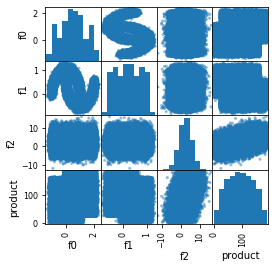

In [ ]:
pd.plotting.scatter_matrix(df_0, figsize=(4, 4)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52a51f7e90>,
      dtype=object)

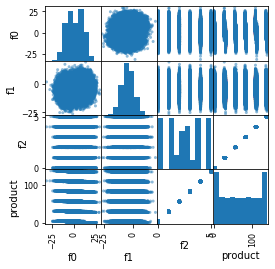

In [ ]:
pd.plotting.scatter_matrix(df_1, figsize=(4, 4)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b002cf10>,
      dtype=object)

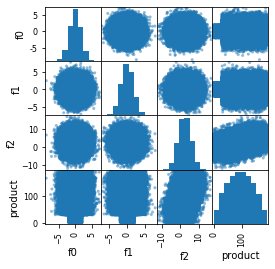

In [ ]:
pd.plotting.scatter_matrix(df_2, figsize=(4, 4)) 

Бросается в глаза прямая корреляция f2 и product в регионе 1
    
  
</div>

Так как столбец id  нам никак не поможет в исследовании, то думаю, совершенно безболезненно избавиться от него 

In [ ]:
df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

Разобьем данные на выборки

In [ ]:
train_0, valid_0 = train_test_split(df_0, test_size=0.25, random_state=12345)
train_1, valid_1 = train_test_split(df_1, test_size=0.25, random_state=12345)
train_2, valid_2 = train_test_split(df_2, test_size=0.25, random_state=12345)

In [ ]:
features_train_0 = train_0.drop('product', axis=1)
target_train_0 = train_0['product']
features_valid_0 = valid_0.drop('product', axis=1)
target_valid_0 = valid_0['product']
features_train_1 = train_1.drop('product', axis=1)
target_train_1 = train_1['product']
features_valid_1 = valid_1.drop('product', axis=1)
target_valid_1 = valid_1['product']
features_train_2 = train_2.drop('product', axis=1)
target_train_2 = train_2['product']
features_valid_2 = valid_2.drop('product', axis=1)
target_valid_2 = valid_2['product']

In [ ]:
train_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 27212 to 86498
Data columns (total 4 columns):
f0         75000 non-null float64
f1         75000 non-null float64
f2         75000 non-null float64
product    75000 non-null float64
dtypes: float64(4)
memory usage: 2.9 MB


## Обучите и проверьте модель для каждого региона

обучим и проверим модель линейной регресии

In [ ]:
model_0 = LinearRegression() 
model_0.fit(features_train_0, target_train_0) 
predictions_valid_0 = model_0.predict(features_valid_0)
result_0 = mean_squared_error(target_valid_0, predictions_valid_0)**0.5 
print('Region 0')
print(df_0['product'].mean())
print(predictions_valid_0.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result_0)

Region 0
92.50000000000001
92.59256778438038
RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813


In [ ]:
model_1 = LinearRegression() 
model_1.fit(features_train_1, target_train_1) 
predictions_valid_1 = model_1.predict(features_valid_1)
result_1 = mean_squared_error(target_valid_1, predictions_valid_1)**0.5 
print('Region 1')
print(df_1['product'].mean())
print(predictions_valid_1.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result_1)

Region 1
68.82500000000002
68.728546895446
RMSE модели линейной регрессии на валидационной выборке: 0.893099286775616


In [ ]:
model_2 = LinearRegression() 
model_2.fit(features_train_2, target_train_2) 
predictions_valid_2 = model_2.predict(features_valid_2)
result_2 = mean_squared_error(target_valid_2, predictions_valid_2)**0.5 
print('Region 2')
print(df_2['product'].mean())
print(predictions_valid_2.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result_2)

Region 2
95.00000000000004
94.96504596800489
RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434


Величина RMSE показывает, насколько правильный ответ отличается от предсказания. Значение RMSE должно быть как можно меньше. В наших данных минимальное значение RMSE показывает только регион 1.

## Подготовка к расчёту прибыли

In [ ]:
number_of_wells = 200 #количество скважин, которые нужно отобрать
wells_for_scouting = 500 #количество скважин для разведки
budget = 10000000000 #бюджет на разработку скважин в регионе
budget_per_well = budget/number_of_wells #бюджет на одну скважину
income_per_barrel = 450 #доход с одного барреля
income = 450000 #доход с одной единицы в столбце 'product'
volume = budget_per_well/income #объем, который необходим для безубыточной деятельности
print(volume)

111.11111111111111


In [ ]:
print('Средний запас сырья в Регионе 0:', df_0['product'].mean())
print('Средний запас сырья в Регионе 1:', df_1['product'].mean())
print('Средний запас сырья в Регионе 2:', df_2['product'].mean())

Средний запас сырья в Регионе 0: 92.50000000000001
Средний запас сырья в Регионе 1: 68.82500000000002
Средний запас сырья в Регионе 2: 95.00000000000004


Вывод: для безуботочной деятельности необходим объем в размере 111 тысяч баррелей, вместе с тем ни один из регионов не дотягивает до этих показателей в среднем. 

## Расчёт прибыли и рисков 

Сделаем функцию для расчета прибыли. Для этого будем выбирать топ-200 скважин, прибыль считаем по валицадионной выборке.

In [ ]:
def revenue(target, predict):
    predict_sorted = pd.Series(predict).sort_values(ascending=False)
    selected = target.reset_index(drop=True)[predict_sorted.index][:number_of_wells]
    
    profit = (income * selected.sum()) - budget
    return profit

In [ ]:

revenue_0 = revenue(target_valid_0, predictions_valid_0)
print(revenue_0)


3320826043.1398525


In [ ]:
revenue_1 = revenue(target_valid_1, predictions_valid_1)
print(revenue_1)

2415086696.681511


In [ ]:
revenue_2 = revenue(target_valid_2, predictions_valid_2)
print(revenue_2)

2710349963.5998325


сделаем функцию для расчета прибыли  и рисков, применив bootstrap

In [ ]:
def count_revenue(target, predict):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_sample = pd.Series(target).reset_index(drop=True).sample(n=wells_for_scouting, replace=True, random_state = state)
        predictions_sample = pd.Series(predict[target_sample.index])
        revenue_sample = revenue(target_sample, predictions_sample)
        values.append(revenue_sample)
        
    values = pd.Series(values)
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    count = 0
    for i in range(len(values)):
        if values[i] < 0:
            count +=1
            risks = count/len(values)*100 #риск убытков в процентах
    print('Средняя прибыль =', values.mean()) 
    print('95%-ый доверительный интервал:', confidence_interval) 
    print('Риск убытков =', risks)
    return values.mean(), lower, upper, risks
    

In [ ]:
count_revenue(target_valid_0, predictions_valid_0)

Средняя прибыль = 396164984.8023711
95%-ый доверительный интервал: (379620315.1479725, 412709654.45676965)
Риск убытков = 6.9


(396164984.8023711, -111215545.89049526, 909766941.5534225, 6.9)

С наибольшей вероятностью прибыль в регионе 0 будет находиться между -111 млн и 910 млн рублей при среднем значении в 396 млн; риск убытков составляет 6,9%

In [ ]:
count_revenue(target_valid_1, predictions_valid_1)

Средняя прибыль = 456045105.7866609
95%-ый доверительный интервал: (443147248.6639007, 468942962.90942115)
Риск убытков = 1.5


(456045105.7866609, 33820509.39898549, 852289453.866036, 1.5)

С наибольшей вероятностью прибыль в регионе 1 будет находиться между 34 млн и 852 млн рублей при среднем значении в 456 млн; риск убытков - 1,5%

In [ ]:
count_revenue(target_valid_2, predictions_valid_2)

Средняя прибыль = 404403866.56835675
95%-ый доверительный интервал: (387445797.47128034, 421361935.66543317)
Риск убытков = 7.6


(404403866.56835675, -163350413.39559925, 950359574.9237995, 7.6)

С наибольшей вероятностью прибыль в регионе 2 будет находиться между -163 млн и 950 млн рублей при среднем значении в 404 млн, риск убытков - 7,6%

ИТОГО:

1) были изучены данные по 3 регионам

2) были изучены данные модели логистической регрессии и RMSE

3) минимальное значение RMSE было получено на данных региона 1

4) была состалена функция расчета прибыли и рисков по регионам с использованием bootstrap

5) изучив все данные, можно сделать вывод, что наиболее выгодным регионом является регион 1: RMSE = 0,89, средняя прибыль составляет 456 млн, 2,5% квартиль составляет 33 млн (а не уходит в минус как в регионах 0 и 2), риск убытков = 1,5%.